# 📦 1. Import Required Libraries


In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, roc_curve, precision_recall_curve
)

#📥 2. Load & Prepare the Dataset


In [47]:
df = pd.read_csv('data.csv')

# Display the first few rows and information about the dataframe
display(df.head())
display(df.info())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

None

In [48]:
print(df.shape)
print(df['diagnosis'].value_counts())


(569, 32)
diagnosis
B    357
M    212
Name: count, dtype: int64


#🔁 3. Convert Categorical Target to Binary


In [49]:
df['target'] = df['diagnosis'].map({'M': 0, 'B': 1})


In [50]:
df.drop(columns=['diagnosis'], inplace=True)


In [51]:
df['target'].value_counts()

,count
target,
1,357
0,212


#📊 4. EDA (Exploratory Data Analysis)


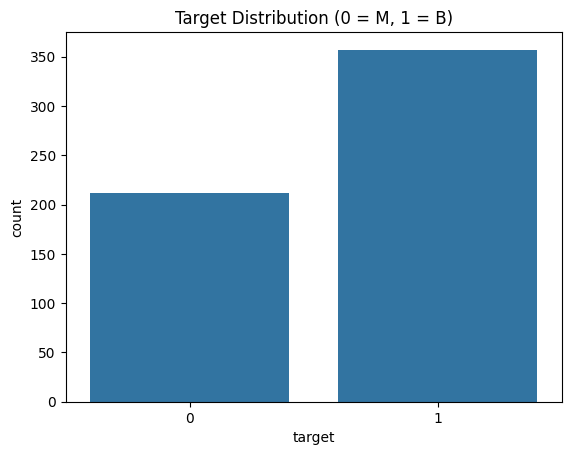

In [52]:
sns.countplot(x='target', data=df)
plt.title("Target Distribution (0 = M, 1 = B)")
plt.show()


In [53]:
print(df.describe())


                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

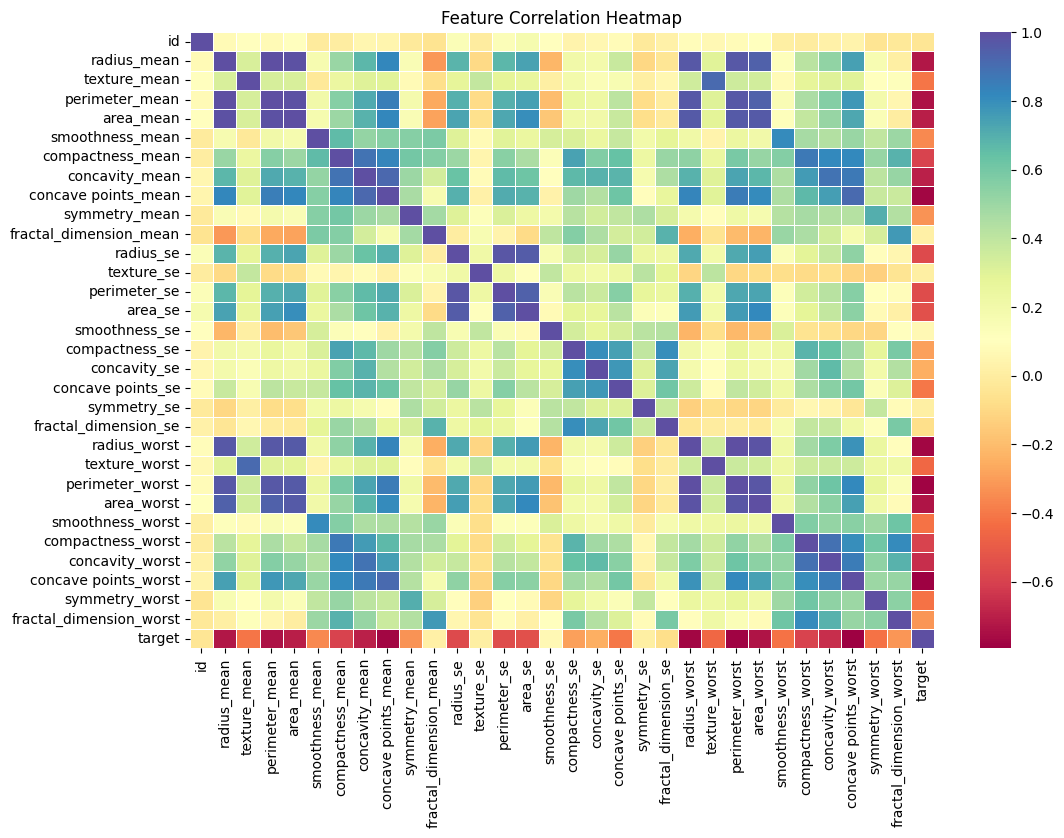

In [54]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='Spectral', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [55]:
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

In [56]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [57]:
correlation_matrix = df.corr()
target_corr = correlation_matrix['target'].drop('target')
print("All features correlated with target:")
print(target_corr.sort_values(ascending=False))

All features correlated with target:
smoothness_se              0.067016
fractal_dimension_mean     0.012838
texture_se                 0.008303
symmetry_se                0.006522
fractal_dimension_se      -0.077972
concavity_se              -0.253730
compactness_se            -0.292999
fractal_dimension_worst   -0.323872
symmetry_mean             -0.330499
smoothness_mean           -0.358560
concave points_se         -0.408042
texture_mean              -0.415185
symmetry_worst            -0.416294
smoothness_worst          -0.421465
texture_worst             -0.456903
area_se                   -0.548236
perimeter_se              -0.556141
radius_se                 -0.567134
compactness_worst         -0.590998
compactness_mean          -0.596534
concavity_worst           -0.659610
concavity_mean            -0.696360
area_mean                 -0.708984
radius_mean               -0.730029
area_worst                -0.733825
perimeter_mean            -0.742636
radius_worst              -

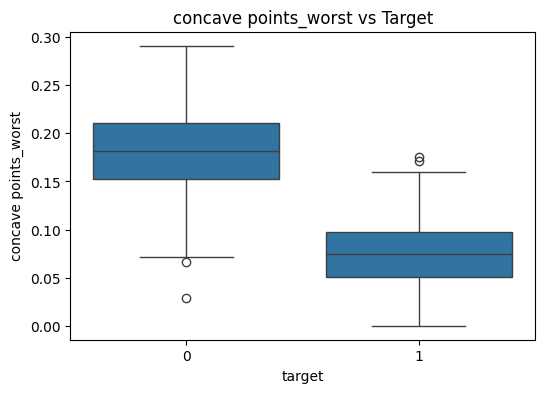

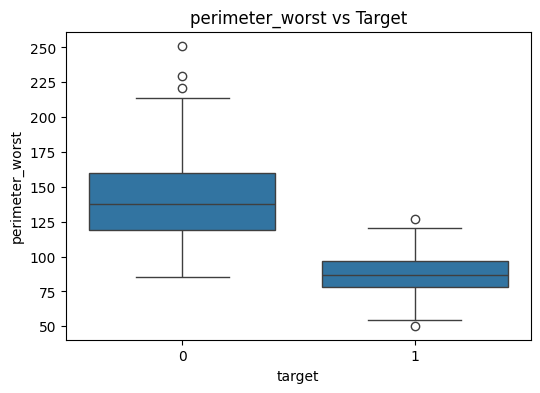

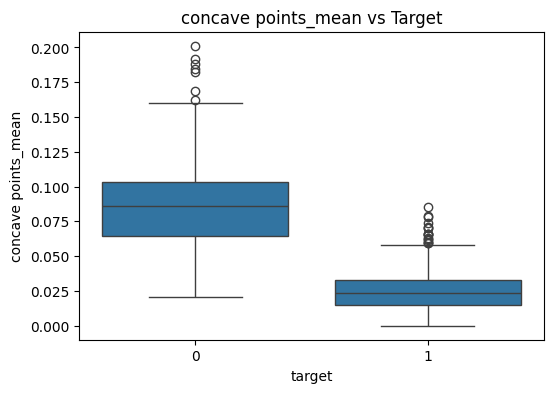

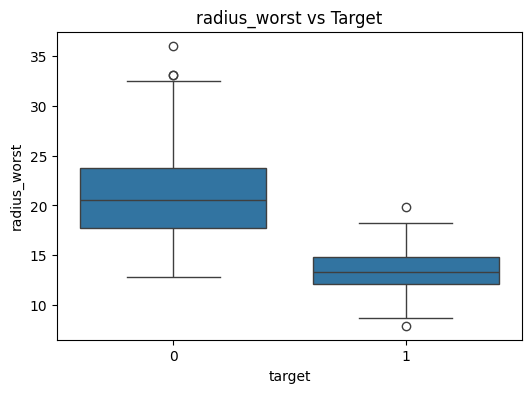

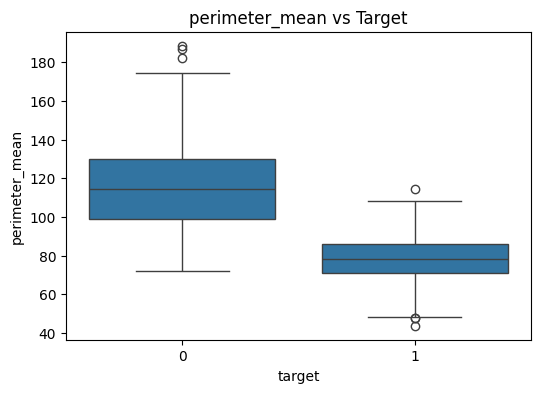

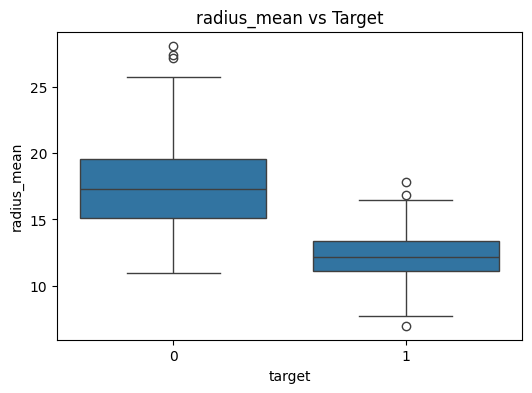

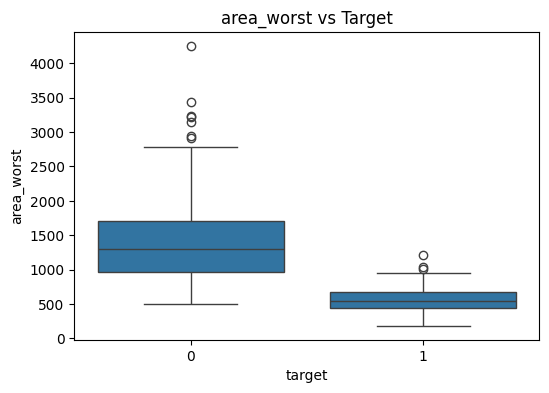

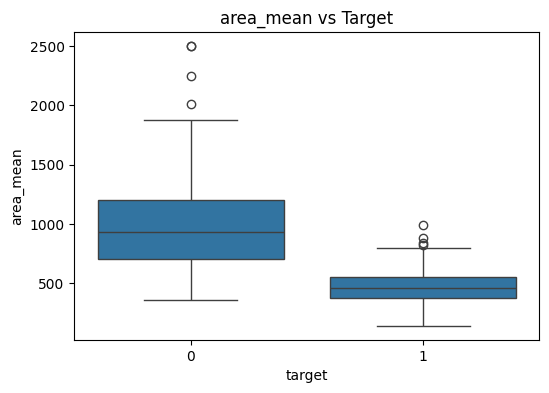

In [58]:
top_corr_features = [
    'concave points_worst', 'perimeter_worst', 'concave points_mean',
    'radius_worst', 'perimeter_mean', 'radius_mean',
    'area_worst', 'area_mean'
]

for feature in top_corr_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f"{feature} vs Target")
    plt.show()

#⚙️ 5. Split Features & Labels


In [59]:
X = df.drop('target', axis=1)
y = df['target']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [60]:
print("Train split:\n", y_train.value_counts())
print("\nTest split:\n", y_test.value_counts())

Train split:
 target
1    285
0    170
Name: count, dtype: int64

Test split:
 target
1    72
0    42
Name: count, dtype: int64


# 🔧 Step 6: Feature Scaling


In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🤖 Step 7: Train the Logistic Regression Model


In [62]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import os
os.makedirs('/content/drive/MyDrive/plots', exist_ok=True)

# 📈 Step 8: Model Evaluation


Confusion Matrix:
[[41  1]
 [ 1 71]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


ROC AUC Score: 0.9954


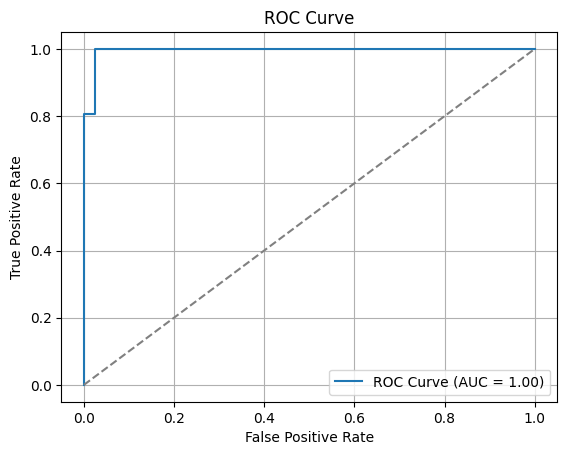

In [65]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nROC AUC Score: {roc_auc:.4f}")

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.savefig('/content/drive/MyDrive/plots/roc_curve.png', dpi=300)
plt.show()

# ⚖️ Step 9: Threshold Tuning Example


In [66]:
threshold = 0.3
y_thresh = (y_proba >= threshold).astype(int)

print(f"Confusion Matrix @ threshold {threshold}:")
print(confusion_matrix(y_test, y_thresh))
print("\nClassification Report:")
print(classification_report(y_test, y_thresh))



Confusion Matrix @ threshold 0.3:
[[40  2]
 [ 0 72]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# 📉 Step 10: Precision-Recall Curve


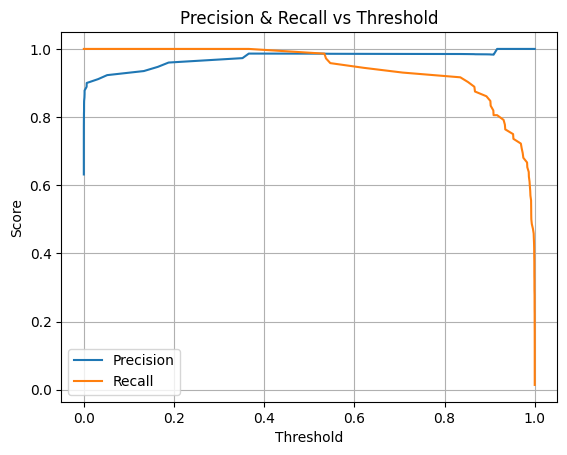

In [67]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision & Recall vs Threshold')
plt.legend()
plt.grid()
plt.savefig('/content/drive/MyDrive/plots/precision_recall_vs_threshold.png', dpi=300)
plt.show()

# 📌 Step 11: Explainable Logistic Regression - Coefficients


Top 10 Influential Features:
                 Feature  Coefficient
21         texture_worst    -1.255088
10             radius_se    -1.082965
27  concave points_worst    -0.953686
23            area_worst    -0.947756
20          radius_worst    -0.947616
28        symmetry_worst    -0.939181
13               area_se    -0.929104
26       concavity_worst    -0.823151
22       perimeter_worst    -0.763220
24      smoothness_worst    -0.746625


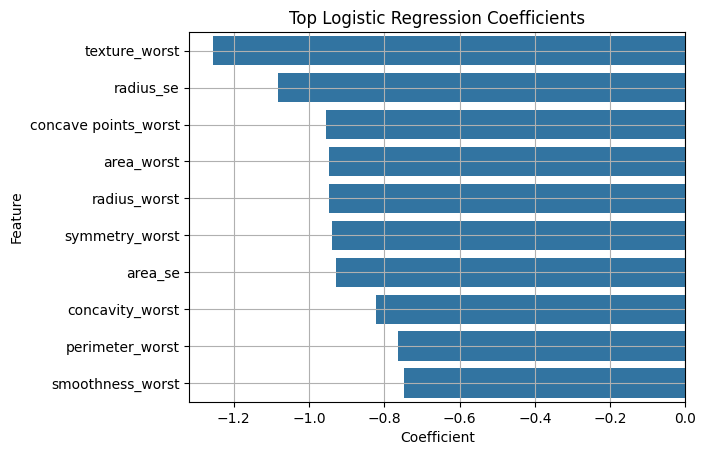

In [68]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("Top 10 Influential Features:")
print(importance.head(10))

sns.barplot(x='Coefficient', y='Feature', data=importance.head(10))
plt.title('Top Logistic Regression Coefficients')
plt.grid()
plt.show()

